# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The TMDb Movie data contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings, budget and revenue. There is one table in the dataset.

#### Data Columns

No. | Column Name | Description 
:--- |:--- |:---
1 | id | movie id with only integers
2 | imdb_id | movie id with both string and integers
3 | popularity | a score of popularity
4 | budget | integers
5 | revenue | integers
6 | original_title | strings
7 | cast | multiple names separated by pipe (\|) characters
8 | homepage | a hyperlink
9 | director | multiple names separated by pipe (\|) characters
10 | tagline | strings
11 | keywords | multiple values separated by pipe (\|) characters
12 | overview | strings
13 | runtime | movie length in minutes	
14 | genres | multiple values separated by pipe (\|) characters
15 | production_companies | multiple names separated by pipe (\|) characters
16 | release_date | day/month/year
17 | vote_count | number of votes for the movie
18 | vote_average | a float number within 10
19 | release_year | integers
20 | budget_adj |the budget of the associated movie in terms of 2010 dollars, accounting for inflation over time	
21 | revenue_adj |the revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time


### Questions for Analysis

1. Do movies with higher popularity scores have higher revenue? 
1. Do movies in a certain genre more likely to receive higher average votes?
1. Who is the best director from year to year in terms of movie popularity?
1. Which genre of movie is making most of the money from latest 5 decades?

#### Key Variables

No. | Variables | Dependence 
:--- |:--- |:---
1 | popularity | dependent
2 | revenue | dependent
3 | average vote | dependent
4 | genre | independent
5 | director | independent
6 | release_year | independent

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# import seaborn as sns

%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0
print(pd.__version__)

1.3.4


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [4]:
# read data
df = pd.read_csv('./tmdb-movies.csv')

In [5]:
# suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# change display max_columns
pd.set_option('display.max_columns', 100)

In [6]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


In [7]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.08,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.40,1966,0.00,0.00
10862,20379,tt0060472,0.07,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.70,1966,0.00,0.00
10863,39768,tt0060161,0.07,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.50,1966,0.00,0.00
10864,21449,tt0061177,0.06,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.40,1966,0.00,0.00
10865,22293,tt0060666,0.04,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.50,1966,127642.28,0.00


### Data Cleaning 

In [8]:
df.shape

(10866, 21)

#### Data Overview

There are originally 10,866 rows and 21 columns in the data frame.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Data Types

The data types are reasonable except for **release_year**, which can be changed to `datetime` formate.

Column | Dtype 
:--| :--
id | int64  
imdb_id | string 
popularity | float64
budget  |int64  
 revenue | int64  
original_title | string  
cast | string  
homepage  | string  
director | string  
tagline  | string  
keywords | string 
overview | string 
runtime | int64
genres | string
production_companies | string
release_date | string
vote_count | int64  
vote_average | float64
**release_year** | `int64`  
budget_adj | float64
revenue_adj | float64


In [10]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


#### Missing Values 

The following columns contain missing values. I will not include variables with large amount of missing values, such as homepage (7,930 out of 10,866) and tagline (2,824 out ot 10,866), in the analysis.

- imdb_id
- cast
- homepage              
- director  
- tagline 
- keywords 
- overview    
- genres 
- production_companies 

Although there are no missing values in the following columns, they have many zero values which should be taken into consideration as missing values, because zero budget, zero revenue and zero runtime don't make sense for a movie. I will not drop these values for now because there are other useful information, such as genres and votes, in the same rows.

- budget  
- revenue 
- budget_adj
- revenue_adj
- runtime

In [12]:
# df.head()

In [13]:
# drop unnecessary columns
df.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'overview'], axis=1, inplace=True)

In [14]:
sum(df['runtime']<=0)

31

In [15]:
sum(df['revenue_adj']<=0), sum(df['revenue_adj']<=0), sum((df['revenue_adj']<=0) & (df['revenue_adj']<=0))

(6016, 6016, 6016)

There are 31 movies don't have runtime values, and 6,016 movies don't have revenue and budget values.

In [16]:
sum(df.duplicated())

1

In [17]:
df.loc[df.duplicated(), :]

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,0.60,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00,2010,30000000.00,967000.00


In [18]:
df[df['id']==42194]

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,0.60,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00,2010,30000000.00,967000.00
2090,42194,0.60,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00,2010,30000000.00,967000.00


#### Duplicates

There is **one duplication** in the data frame, for movie with id 42,194.

In [19]:
# drop duplicates
df.drop_duplicates(inplace=True)

#### Structures and Mismatches

The column names are reasonable in the dataset. However, there are multiple values seperated by pipe (|) characters in some columns, which are good for now, but need more manipulation for further analysis.

In **realease_year** column, the data is structured as `month/day/year`, but the year can be misleading because `15` means `year 2015` and `66` means `year 1966`.


In [20]:
# restructure release date to month and day
df['release_date'] = df['release_date'].apply(lambda x: x[:-3])

In [21]:
df['release_date'] = df['release_date'].str.cat(df['release_year'].astype(str), sep='/')

In [22]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%Y')

In [23]:
df.head()

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.28,1392445892.52
1,76341,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,137999939.28,348161292.49
2,262500,13.11,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.30,2015,101199955.47,271619025.41
3,140607,11.17,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,9.34,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.30,2015,174799923.09,1385748801.47


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   original_title        10865 non-null  object        
 3   cast                  10789 non-null  object        
 4   director              10821 non-null  object        
 5   keywords              9372 non-null   object        
 6   runtime               10865 non-null  int64         
 7   genres                10842 non-null  object        
 8   production_companies  9835 non-null   object        
 9   release_date          10865 non-null  datetime64[ns]
 10  vote_count            10865 non-null  int64         
 11  vote_average          10865 non-null  float64       
 12  release_year          10865 non-null  int64         
 13  budget_adj      

In [25]:
df.shape

(10865, 15)

In [26]:
# df.head()

In [27]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00
mean,66066.37,0.65,102.07,217.40,5.98,2001.32,17549894.04,51369001.76
std,92134.09,1.00,31.38,575.64,0.94,12.81,34307526.66,144638333.13
min,5.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.00,0.21,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20662.00,0.38,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75612.00,0.71,111.00,146.00,6.60,2011.00,20853251.08,33701729.01
max,417859.00,32.99,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


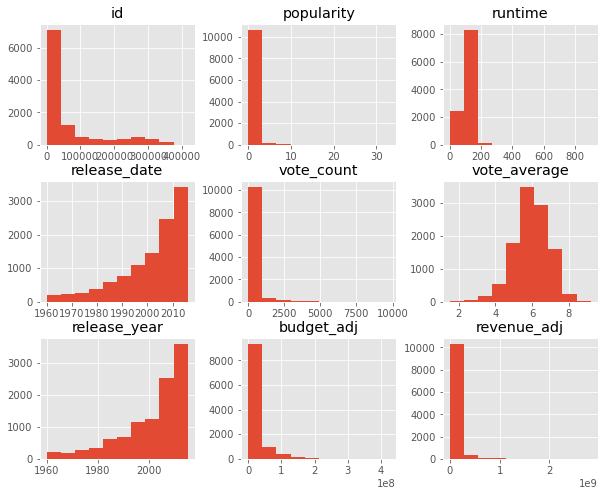

In [28]:
df.hist(figsize=(10,8));

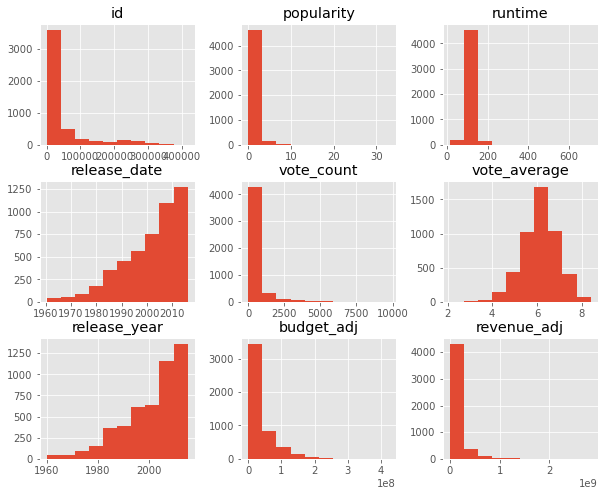

In [29]:
df[df['revenue_adj']>0].hist(figsize=(10,8));

#### Summary
A quick look into the dataset:
1. 75% of the movies have polularity within 1 and there are few movies have high popularity larger than 10.
1. Despite of the outliers, the average movie duration is around 100mins.
1. The number of movies have increased over the years.
1. The average votes for movies are mostly normally distributed and slightly skewed to the left.
1. The distribution for bueget and revenue are all skewd to the right.

<a id='eda'></a>
## Exploratory Data Analysis


### Do movies with higher popularity scores have higher revenue?

In [30]:
# df.head()

In [31]:
# select data with popuarity and revenue
df_pr = df[['id', 'release_year', 'popularity', 'revenue_adj']]

In [32]:
df_pr.head()

,id,release_year,popularity,revenue_adj
0,135397,2015,32.99,1392445892.52
1,76341,2015,28.42,348161292.49
2,262500,2015,13.11,271619025.41
3,140607,2015,11.17,1902723129.80
4,168259,2015,9.34,1385748801.47


In [33]:
# select movies with revenue larger than zero
df_pr = df_pr.loc[df_pr['revenue_adj'] > 0]

<AxesSubplot:title={'center':'Scatter Plot of Movie Popularity vs. Revenue'}, xlabel='Popularity Score', ylabel='Revenue'>

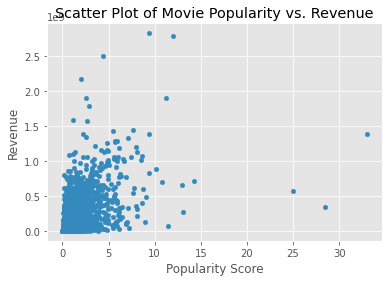

In [34]:
df_pr.plot(x='popularity', y='revenue_adj', kind ='scatter', title='Scatter Plot of Movie Popularity vs. Revenue', 
           xlabel='Popularity Score', ylabel='Revenue')

<AxesSubplot:title={'center':'Box Plot of Movie Popularity'}, ylabel='Popularity Score'>

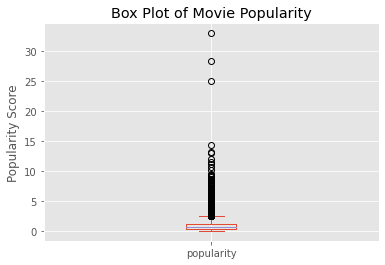

In [35]:
df_pr['popularity'].plot(kind ='box', title='Box Plot of Movie Popularity', ylabel='Popularity Score')

<AxesSubplot:title={'center':'Box Plot of Revenue'}, ylabel='Movie Revenue'>

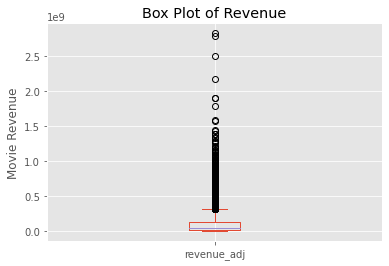

In [36]:
df_pr['revenue_adj'].plot(kind ='box', title='Box Plot of Revenue', ylabel='Movie Revenue')

A scatter plot for popularity and revenue is difficult to tell the relations of the two variables, becuase both of them are heavily affected by outliers, as shown in the box plots. I will then trim the data a little bit for a more clear view.

In [37]:
df_pr.describe(percentiles=[.1, .25, .5, .75, .9])

,id,release_year,popularity,revenue_adj
count,4849.00,4849.00,4849.00,4849.00
mean,44575.49,2000.92,1.05,115100887.63
std,72368.86,11.57,1.36,198855667.98
min,5.00,1960.00,0.00,2.37
10%,1249.80,1985.00,0.22,906346.19
25%,8285.00,1994.00,0.39,10465848.09
50%,12154.00,2004.00,0.68,43956661.16
75%,43959.00,2010.00,1.21,131648235.91
90%,152743.00,2013.00,2.16,306647137.40
max,417859.00,2015.00,32.99,2827123750.41


In [38]:
df_pr_tr = df_pr.loc[(df_pr['popularity']<=3) & (df_pr['revenue_adj']<=10000000000)]

In [39]:
# df_pr_tr['revenue_adj'].plot(kind='box')

<AxesSubplot:title={'center':'Scatter Plot of Movie Popularity vs. Revenue'}, xlabel='Popularity Score', ylabel='Revenue'>

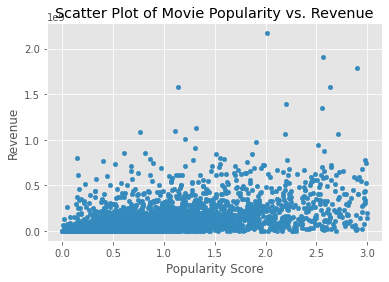

In [40]:
df_pr_tr.plot(x='popularity', y='revenue_adj', kind='scatter', title='Scatter Plot of Movie Popularity vs. Revenue', 
           xlabel='Popularity Score', ylabel='Revenue')

After setting up a maximum threshold for popularity (3) and revenue (10 billion dollars), the scatter plot is more readable. Although some of the high popularity movies have higher revenue, there is no clear relation between popularity and revenue from the plot.

To further analyze the two variables, I decide to calulate the average revenue for movies with different levels of popularities.

In [41]:
# bin edges that will be used to define the level of popularity for a movie
bin_edges = [0, 0.4, 0.7, 2, 50] 

# labels for the four level groups
bin_names = ['low', 'medium', 'high', 'super_high']

# Creates popularity_levels column
df_pr['popularity_levels'] = pd.cut(df_pr['popularity'], bin_edges, labels=bin_names)

In [42]:
df_pr.head()

,id,release_year,popularity,revenue_adj,popularity_levels
0,135397,2015,32.99,1392445892.52,super_high
1,76341,2015,28.42,348161292.49,super_high
2,262500,2015,13.11,271619025.41,super_high
3,140607,2015,11.17,1902723129.80,super_high
4,168259,2015,9.34,1385748801.47,super_high


In [43]:
df_pr.groupby('popularity_levels').mean().revenue_adj.to_frame()

,revenue_adj
popularity_levels,
low,31791476.41
medium,54378129.15
high,130607840.25
super_high,390929233.31


From the table above, it looks like higher popularity movies do have higher revenue. However, I don't want the extrem values to affect the conclusion. For example, a movie with super high revenue happen to have a higher level of popularity, and it may affect the average value. Let's check other metrics as well.

In [44]:
df_pr.groupby('popularity_levels').describe().revenue_adj

,count,mean,std,min,25%,50%,75%,max
popularity_levels,,,,,,,,
low,1261.00,31791476.41,65770153.98,3.04,1528371.89,11660056.05,34251712.55,795538358.30
medium,1230.00,54378129.15,81712438.16,2.37,7163538.14,28839513.87,69434150.98,853081315.97
high,1808.00,130607840.25,152140812.92,22.90,30309249.71,82368457.71,176186261.93,1583049536.35
super_high,550.00,390929233.31,383298654.06,42223.38,122764338.65,288233275.89,540939832.08,2827123750.41


In [45]:
# df_pr.groupby('popularity_levels')['revenue_adj'].hist(alpha=.5)

Based on the mean values and percentiles, I can make a conclusion that movies with higher popularity also have higher revenue. I will go ahead create a visulization for this.

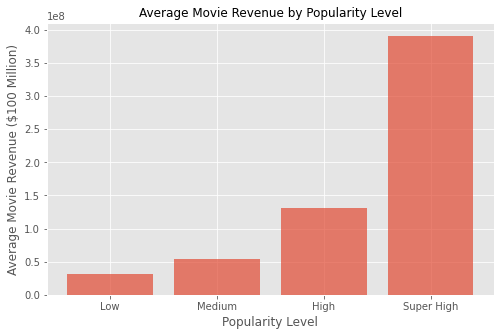

In [46]:
gif, ax = plt.subplots(figsize=(8,5))
pr_means = df_pr.groupby('popularity_levels')['revenue_adj'].mean()
locations = [1, 2, 3, 4]
heights = pr_means
labels = ['Low', 'Medium', 'High', 'Super High']
# labels = pr_means.index.str.replace('_', ' ').str.title()
plt.bar(locations, heights, tick_label=labels, alpha=.7)
plt.title('Average Movie Revenue by Popularity Level',  fontsize=12)
plt.xlabel('Popularity Level', fontsize=12)
plt.ylabel('Average Movie Revenue ($100 Million)', fontsize=12);
# plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

### Do movies in a certain genre more likely to receive higher average votes?

In [47]:
# df.head()

In [48]:
# select data with genres and average votes
df_gv = df[['id', 'release_year', 'genres', 'vote_average', 'vote_count']]

In [49]:
df_gv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10865 non-null  int64  
 1   release_year  10865 non-null  int64  
 2   genres        10842 non-null  object 
 3   vote_average  10865 non-null  float64
 4   vote_count    10865 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 509.3+ KB


In [51]:
# remove missing values in genres
df_gv.dropna(inplace=True)

In [52]:
df_gv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10842 non-null  int64  
 1   release_year  10842 non-null  int64  
 2   genres        10842 non-null  object 
 3   vote_average  10842 non-null  float64
 4   vote_count    10842 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 508.2+ KB


In [53]:
df_gv.head()

,id,release_year,genres,vote_average,vote_count
0,135397,2015,Action|Adventure|Science Fiction|Thriller,6.50,5562
1,76341,2015,Action|Adventure|Science Fiction|Thriller,7.10,6185
2,262500,2015,Adventure|Science Fiction|Thriller,6.30,2480
3,140607,2015,Action|Adventure|Science Fiction|Fantasy,7.50,5292
4,168259,2015,Action|Crime|Thriller,7.30,2947


Since one movie have multiple genres, I will first split the generes column into multiple rows. I used the example from [this link](https://sureshssarda.medium.com/pandas-splitting-exploding-a-column-into-multiple-rows-b1b1d59ea12e)

In [54]:
# first create a new dataframe from the series with movie id as the index
new_df = pd.DataFrame(df_gv.genres.str.split('|').tolist(), index=df_gv.id).stack()

# get rid of the secondary inde, make id as a column
new_df = new_df.reset_index('id')

# set the column names
new_df.columns = ['id', 'genres']

In [55]:
new_df.head(10)

,id,genres
0,135397,Action
1,135397,Adventure
2,135397,Science Fiction
3,135397,Thriller
0,76341,Action
1,76341,Adventure
2,76341,Science Fiction
3,76341,Thriller
0,262500,Adventure
1,262500,Science Fiction


In [56]:
# merge new_df with votes
df_gv = df_gv.merge(new_df, how='left', on='id', copy=False)

In [57]:
# drop the original genres column
df_gv.drop(columns=['genres_x'], inplace=True)

In [58]:
# rename dataframe
df_gv =df_gv.rename(columns = {'genres_y' : 'genres'})

In [59]:
df_gv.head()

,id,release_year,vote_average,vote_count,genres
0,135397,2015,6.50,5562,Action
1,135397,2015,6.50,5562,Adventure
2,135397,2015,6.50,5562,Science Fiction
3,135397,2015,6.50,5562,Thriller
4,76341,2015,7.10,6185,Action


Now that the genres columns are seperated, I will analyze votes within different genres. I calculate the mean, median, minimum and maximum values for average votes, and summarize the total vote counts.

In [60]:
df_gv.groupby('genres').agg({'id': pd.Series.nunique, 
                             'vote_average': [np.mean, np.median, np.min, np.max], 
                             'vote_count':np.sum}) \
.sort_values([('vote_average', 'mean')], ascending=False)

id vote_average                  vote_count
                nunique         mean median amin amax        sum
genres                                                          
Documentary         520         6.91   7.00 4.10 9.20      18255
Music               408         6.48   6.50 3.90 8.70      50731
History             334         6.41   6.50 3.90 8.10      61380
Animation           699         6.40   6.40 2.20 8.30     211797
War                 270         6.30   6.40 3.90 8.10      73098
Drama              4760         6.17   6.20 2.40 8.80     868912
Crime              1354         6.12   6.10 2.40 8.40     377502
Western             165         6.08   6.10 3.30 7.70      33947
Romance            1712         6.04   6.10 2.50 8.40     284313
Family             1231         6.00   6.00 2.10 8.00     335227
Foreign             188         5.98   6.05 3.40 7.80       3126
Mystery             810         5.95   6.00 3.30 8.80     191969
Adventure          1471         5.94   6.00 1.50 8.50     754807
Comedy             3793         5.91   5.90 2.10 8.50     669223
Fantasy             916         5.86   5.90 2.60 8.40     385399
TV Movie            167         5.79   5.90 3.20 7.90       5739
Action             2384         5.79   5.90 1.50 8.10     936897
Thriller           2907         5.75   5.80 2.20 8.80     742693
Science Fiction    1229         5.67   5.80 1.50 8.80     537191
Horror             1637         5.34   5.40 1.50 8.80     196538

It looks like Documentary, Music, History, Animation and War are the top 5 genres that have the highest average votes. However, this result may be affected by the number of people vote for the movies in these genres. If there is only few people voting, the result might be biased, so I will also calculate number of votes per movie for each genre.

In [61]:
gv_mean = df_gv.groupby('genres').agg({'id': pd.Series.nunique, 
                             'vote_average': np.mean, 
                             'vote_count':np.sum})

In [62]:
gv_mean.sort_values('vote_average', ascending=False, inplace=True)

In [63]:
gv_mean.head()

,id,vote_average,vote_count
genres,,,
Documentary,520,6.91,18255
Music,408,6.48,50731
History,334,6.41,61380
Animation,699,6.40,211797
War,270,6.30,73098


In [64]:
gv_mean['vote_per_movie'] = (gv_mean['vote_count']/gv_mean['id']).astype(int)

In [65]:
gv_mean.head(10)

,id,vote_average,vote_count,vote_per_movie
genres,,,,
Documentary,520,6.91,18255,35
Music,408,6.48,50731,124
History,334,6.41,61380,183
Animation,699,6.40,211797,303
War,270,6.30,73098,270
Drama,4760,6.17,868912,182
Crime,1354,6.12,377502,278
Western,165,6.08,33947,205
Romance,1712,6.04,284313,166


Although Documentay has the highest average votes, number of people vote for movies in the genre is small (35). The value of vote_per_movie is essential for understanding genres with high votes. So I decide to plot the visulizations with both average votes and vote per movie in terms of different genres.

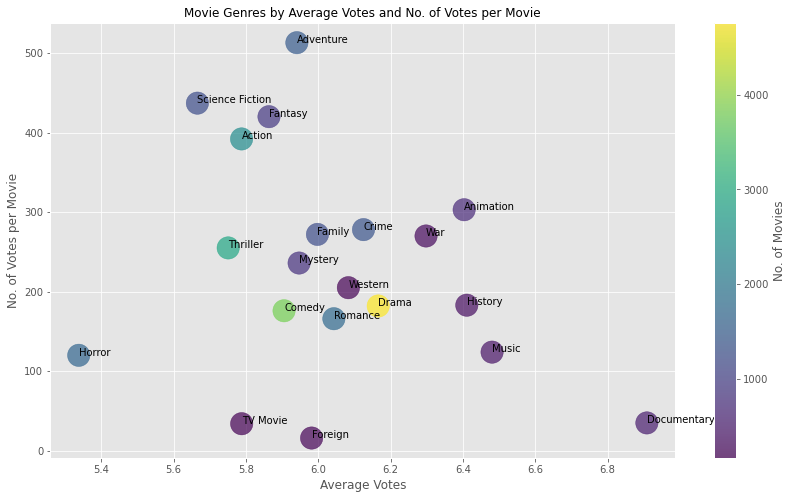

In [66]:
fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(x=gv_mean['vote_average'], y=gv_mean['vote_per_movie'], c=gv_mean['id'], cmap='viridis', s=500, alpha=0.7)
plt.colorbar(label='No. of Movies')
plt.title('Movie Genres by Average Votes and No. of Votes per Movie',  fontsize=12)
plt.xlabel('Average Votes', fontsize=12)
plt.ylabel('No. of Votes per Movie', fontsize=12)
for g in gv_mean.index:
    ax.annotate(g, (gv_mean.loc[g,'vote_average'], gv_mean.loc[g,'vote_per_movie']))

The final visulization have average votes, number of votes per movie and a colorbar showing the number of movies in each genre. 

### Who is the best director from year to year in terms of movie popularity?

In [67]:
# df.head()

In [68]:
# select data with director info
df_dp = df[['id', 'original_title', 'release_year', 'director', 'popularity']]

In [69]:
df_dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   original_title  10865 non-null  object 
 2   release_year    10865 non-null  int64  
 3   director        10821 non-null  object 
 4   popularity      10865 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 509.3+ KB


In [71]:
# remove missing values in cast column
df_dp.dropna(inplace=True)

In [72]:
df_dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10821 entries, 0 to 10865
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10821 non-null  int64  
 1   original_title  10821 non-null  object 
 2   release_year    10821 non-null  int64  
 3   director        10821 non-null  object 
 4   popularity      10821 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 507.2+ KB


Split the director column using the same method as I deal with genres, I will create an UDF for this method as it can be reused during the analysis.

In [73]:
def column_split(df, column_name, index_name):
    new_df = pd.DataFrame(df[column_name].str.split('|').tolist(), index=df[index_name]).stack()
    new_df = new_df.reset_index(index_name)
    new_df.columns = [index_name, column_name]
    # merge data frames
    df_merged = df.merge(new_df, how='left', on=index_name, copy=False)
    df_merged.drop(columns=column_name + '_x', inplace=True)
    df_merged =df_merged.rename(columns = {column_name + '_y' :column_name})
    return df_merged

In [74]:
df_dp = column_split(df_dp, 'director', 'id')

In [75]:
df_dp.head()

,id,original_title,release_year,popularity,director
0,135397,Jurassic World,2015,32.99,Colin Trevorrow
1,76341,Mad Max: Fury Road,2015,28.42,George Miller
2,262500,Insurgent,2015,13.11,Robert Schwentke
3,140607,Star Wars: The Force Awakens,2015,11.17,J.J. Abrams
4,168259,Furious 7,2015,9.34,James Wan


In [76]:
# df_dp[df_dp['director']=='Wolf Rilla']

In [77]:
dp_mean = df_dp.groupby(['release_year', 'director']).agg({'id':pd.Series.nunique,
                                                           'popularity':np.mean}).reset_index()

In [78]:
dp_mean.head()

,release_year,director,id,popularity
0,1960,Alfred Hitchcock,1,2.61
1,1960,Billy Wilder,1,0.95
2,1960,Budd Boetticher,1,0.27
3,1960,David Miller,1,0.23
4,1960,David Swift,1,0.25


In [79]:
# get director with the highest average popularity score of the year
dp_mean.loc[dp_mean.groupby('release_year')['popularity'].idxmax()]

,release_year,director,id,popularity
0,1960,Alfred Hitchcock,1,2.61
36,1961,Clyde Geronimi,1,2.63
100,1962,Terence Young,1,3.17
139,1963,Terence Young,1,2.51
157,1964,Guy Hamilton,1,3.15
214,1965,Terence Young,1,1.91
220,1966,Ben Washam,1,1.23
302,1967,Wolfgang Reitherman,1,2.55
337,1968,Stanley Kubrick,1,3.31
365,1969,Peter R. Hunt,1,1.78


Marjority of the direcotrs only make one movie in a year, exceppt for *Francis Ford Coppola* who made two movies in 1974.

In [80]:
dp_max = dp_mean.loc[dp_mean.groupby('release_year')['popularity'].idxmax()]

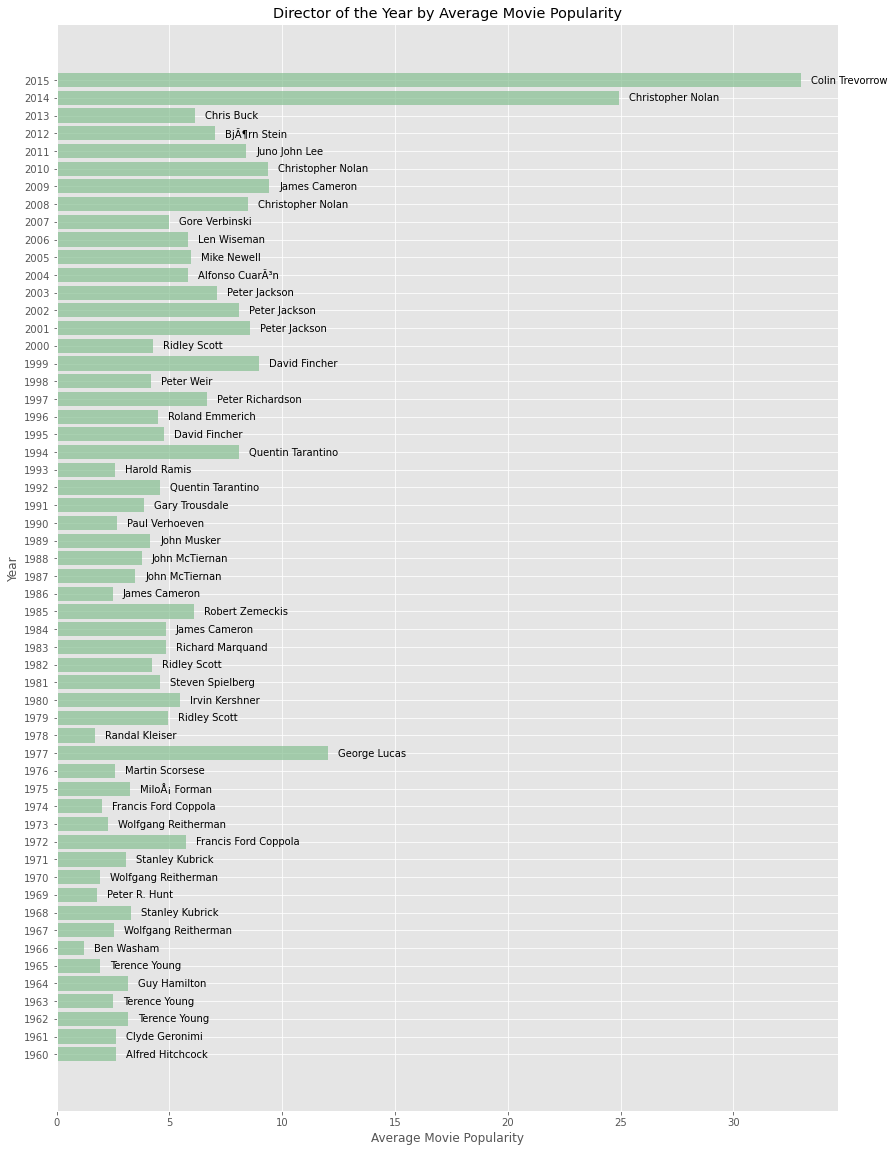

In [81]:
fig, ax = plt.subplots(figsize=(14,20))
barh = plt.barh(dp_max['release_year'], dp_max['popularity'], tick_label=dp_max['release_year'], alpha=.7, color= '#86bf91')
plt.title('Director of the Year by Average Movie Popularity')
plt.ylabel('Year')
plt.xlabel('Average Movie Popularity')
ax.bar_label(barh, labels=dp_max['director'], padding=10)
plt.show()

The above visualisation gives a clear picture of the most popular director of each year from 1960 to 2015. However, when I am checking the director name, I would also like to know which movie is the most popular one for that director in the year. I will add this information to the plot as well.

In [82]:
dp_max.head()

,release_year,director,id,popularity
0,1960,Alfred Hitchcock,1,2.61
36,1961,Clyde Geronimi,1,2.63
100,1962,Terence Young,1,3.17
139,1963,Terence Young,1,2.51
157,1964,Guy Hamilton,1,3.15


In [83]:
df_dp.head()

,id,original_title,release_year,popularity,director
0,135397,Jurassic World,2015,32.99,Colin Trevorrow
1,76341,Mad Max: Fury Road,2015,28.42,George Miller
2,262500,Insurgent,2015,13.11,Robert Schwentke
3,140607,Star Wars: The Force Awakens,2015,11.17,J.J. Abrams
4,168259,Furious 7,2015,9.34,James Wan


In [84]:
# get all the movies for the director and the year
df_dm = dp_max.merge(df_dp, how='left', on=['release_year', 'director'], suffixes=('', '_movie')) \
    [['release_year', 'director', 'popularity', 'popularity_movie', 'original_title']]

In [85]:
df_dm.head(10)

,release_year,director,popularity,popularity_movie,original_title
0,1960,Alfred Hitchcock,2.61,2.61,Psycho
1,1961,Clyde Geronimi,2.63,2.63,One Hundred and One Dalmatians
2,1962,Terence Young,3.17,3.17,Dr. No
3,1963,Terence Young,2.51,2.51,From Russia With Love
4,1964,Guy Hamilton,3.15,3.15,Goldfinger
5,1965,Terence Young,1.91,1.91,Thunderball
6,1966,Ben Washam,1.23,1.23,How the Grinch Stole Christmas!
7,1967,Wolfgang Reitherman,2.55,2.55,The Jungle Book
8,1968,Stanley Kubrick,3.31,3.31,2001: A Space Odyssey
9,1969,Peter R. Hunt,1.78,1.78,On Her Majesty's Secret Service


In [86]:
# get the movie title with the highest popularity score
# in this case there is only changes for Francis Ford Coppola in 1974
dm_max = df_dm.loc[df_dm.groupby('release_year')['popularity_movie'].idxmax()]

In [87]:
dm_max

,release_year,director,popularity,popularity_movie,original_title
0,1960,Alfred Hitchcock,2.61,2.61,Psycho
1,1961,Clyde Geronimi,2.63,2.63,One Hundred and One Dalmatians
2,1962,Terence Young,3.17,3.17,Dr. No
3,1963,Terence Young,2.51,2.51,From Russia With Love
4,1964,Guy Hamilton,3.15,3.15,Goldfinger
5,1965,Terence Young,1.91,1.91,Thunderball
6,1966,Ben Washam,1.23,1.23,How the Grinch Stole Christmas!
7,1967,Wolfgang Reitherman,2.55,2.55,The Jungle Book
8,1968,Stanley Kubrick,3.31,3.31,2001: A Space Odyssey
9,1969,Peter R. Hunt,1.78,1.78,On Her Majesty's Secret Service


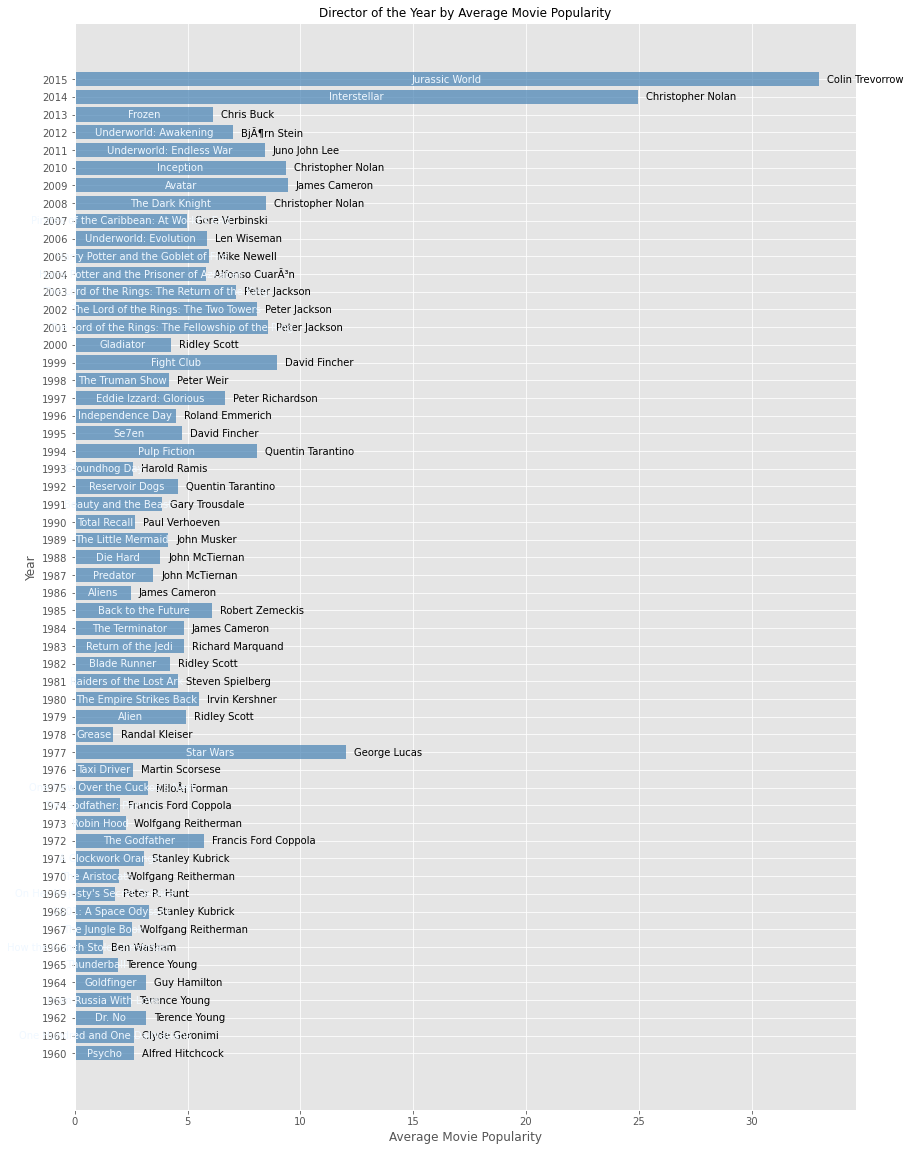

In [88]:
fig, ax = plt.subplots(figsize=(14,20))
barh = plt.barh(dm_max['release_year'], dm_max['popularity'], tick_label=dm_max['release_year'], alpha=.7, color= 'steelblue')
plt.title('Director of the Year by Average Movie Popularity',  fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xlabel('Average Movie Popularity', fontsize=12)
ax.bar_label(barh, labels=dm_max['director'], padding=8)
ax.bar_label(barh, labels=dm_max['original_title'], label_type='center', color='aliceblue')
plt.show()

Now the plot gives both information about the most popular director, and the movie associate with the director across the years. Note that when the popularity socre is quite small for the year, the movie name is not clear, but I decide that this infomation is not so important when the popularity score is small. It will also be useful if add the number of movies for the director.

### Which genre of movie is making most of the money from latest 5 decades?

In [89]:
# df.head()

In [90]:
# select data with genres and revenue
df_gr = df[['id', 'release_year', 'genres', 'revenue_adj']]

In [91]:
df_gr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10865 non-null  int64  
 1   release_year  10865 non-null  int64  
 2   genres        10842 non-null  object 
 3   revenue_adj   10865 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 424.4+ KB


In [94]:
# remove missing values
df_gr.dropna(inplace=True)

In [95]:
df_gr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10842 non-null  int64  
 1   release_year  10842 non-null  int64  
 2   genres        10842 non-null  object 
 3   revenue_adj   10842 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 423.5+ KB


In [96]:
# select movies with revenue larger than zero
df_gr = df_gr.loc[df_gr['revenue_adj']>0]

In [97]:
# split genres columns use the UDF
df_gr = column_split(df_gr, 'genres', 'id')

In [98]:
df_gr.head()

,id,release_year,revenue_adj,genres
0,135397,2015,1392445892.52,Action
1,135397,2015,1392445892.52,Adventure
2,135397,2015,1392445892.52,Science Fiction
3,135397,2015,1392445892.52,Thriller
4,76341,2015,348161292.49,Action


In [99]:
df_gr.describe()

,id,release_year,revenue_adj
count,12664.00,12664.00,12664.00
mean,39894.47,2000.46,129602508.30
std,67426.41,11.56,215945918.74
min,5.00,1960.00,2.37
25%,7446.00,1993.00,13230183.76
50%,11665.00,2003.00,50833522.67
75%,37415.00,2010.00,152657971.22
max,417859.00,2015.00,2827123750.41


In [100]:
# group release_year to decades
bin_edges = [1965, 1975, 1985, 1995, 2005, 2015] 
bin_names = ['1965-1975', '1975-1985', '1985-1995', '1995-2005', '2005-2015']

df_gr['decade'] = pd.cut(df_gr['release_year'], bin_edges, labels=bin_names)

In [101]:
df_gr.head()

,id,release_year,revenue_adj,genres,decade
0,135397,2015,1392445892.52,Action,2005-2015
1,135397,2015,1392445892.52,Adventure,2005-2015
2,135397,2015,1392445892.52,Science Fiction,2005-2015
3,135397,2015,1392445892.52,Thriller,2005-2015
4,76341,2015,348161292.49,Action,2005-2015


In [102]:
df_gr.groupby(['decade', 'genres']).agg({'id':pd.Series.nunique, 'revenue_adj':np.sum})

id    revenue_adj
decade    genres                               
1965-1975 Action           41.00  9366172028.06
          Adventure        33.00  9994955196.57
          Animation         3.00  1815678234.91
          Comedy           23.00  5810596602.83
          Crime            33.00  6748660977.27
...                          ...            ...
2005-2015 Science Fiction 230.00 48000311215.72
          TV Movie           NaN           0.00
          Thriller        619.00 55503570260.77
          War              53.00  4846739743.24
          Western          19.00  1918534157.16

[100 rows x 2 columns]

In [103]:
gr_sum = df_gr.groupby(['decade', 'genres']).agg({'id':pd.Series.nunique, 'revenue_adj':np.sum})

In [104]:
gr_sum.head()

id   revenue_adj
decade    genres                       
1965-1975 Action    41.00 9366172028.06
          Adventure 33.00 9994955196.57
          Animation  3.00 1815678234.91
          Comedy    23.00 5810596602.83
          Crime     33.00 6748660977.27

In [105]:
gr_pct = gr_sum['revenue_adj'].groupby(level=0).apply(lambda x:100*x/float(x.sum()))

In [106]:
gr_pct.unstack()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
decade,,,,,,,,,,,,,,,,,,,,
1965-1975,11.15,11.90,2.16,6.92,8.03,0.00,19.63,2.54,0.28,0.00,1.93,5.81,1.44,2.02,3.78,3.37,0.00,14.82,2.23,2.00
1975-1985,15.36,15.10,0.45,9.94,2.92,0.01,12.05,3.87,4.61,0.01,1.00,3.97,2.81,1.28,4.74,11.73,0.00,8.58,1.22,0.37
1985-1995,11.91,8.34,2.08,13.71,7.01,0.01,14.73,6.59,4.62,0.02,0.70,2.01,0.96,3.25,6.83,4.58,0.00,10.77,1.17,0.69
1995-2005,12.95,11.66,3.00,11.75,4.97,0.11,11.81,5.84,6.41,0.02,1.24,2.55,0.64,3.19,5.67,5.98,0.01,10.67,1.26,0.26
2005-2015,14.17,14.66,5.55,10.46,3.66,0.10,9.17,7.98,8.08,0.02,0.58,1.77,0.87,2.20,3.87,7.34,0.00,8.49,0.74,0.29


<AxesSubplot:title={'center':'Revenue% by Movie Genres'}, ylabel='decade'>

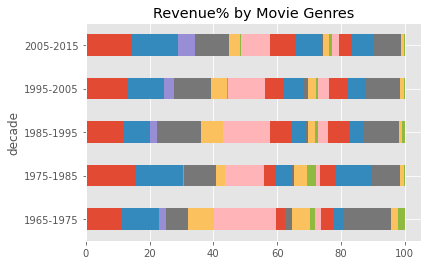

In [107]:
gr_pct.unstack().plot.barh(stacked=True, title = 'Revenue% by Movie Genres', legend=False)

The above visualization have all the revenue proportions by genres for each decade, it contains too much information and it is hard to identify the top genres. I decide to plot only the top 3 genres from each decade.

In [108]:
gr_sum.head()

id   revenue_adj
decade    genres                       
1965-1975 Action    41.00 9366172028.06
          Adventure 33.00 9994955196.57
          Animation  3.00 1815678234.91
          Comedy    23.00 5810596602.83
          Crime     33.00 6748660977.27

In [109]:
gr_sum['rank'] = gr_sum.groupby(level=0)['revenue_adj'].rank('dense', ascending=False)

In [110]:
gr_sum.head(10)

id    revenue_adj  rank
decade    genres                                
1965-1975 Action      41.00  9366172028.06  4.00
          Adventure   33.00  9994955196.57  3.00
          Animation    3.00  1815678234.91 12.00
          Comedy      23.00  5810596602.83  6.00
          Crime       33.00  6748660977.27  5.00
          Documentary  1.00      132668.52 18.00
          Drama       68.00 16494540497.08  1.00
          Family       8.00  2136427655.77 10.00
          Fantasy      5.00   235807230.10 17.00
          Foreign       NaN           0.00 19.00

In [111]:
gr_top3 = gr_sum[gr_sum['rank']<=3]

In [112]:
gr_top3.head()

id    revenue_adj  rank
decade    genres                               
1965-1975 Adventure  33.00  9994955196.57  3.00
          Drama      68.00 16494540497.08  1.00
          Thriller   36.00 12449606736.51  2.00
1975-1985 Action    109.00 21607110858.10  1.00
          Adventure  91.00 21243637815.54  2.00

In [113]:
genres_rank = gr_top3.reset_index().pivot(index='decade', columns='rank', values='genres')

In [114]:
genres_rank

rank,1.00,2.00,3.00
decade,,,
1965-1975,Drama,Thriller,Adventure
1975-1985,Action,Adventure,Drama
1985-1995,Drama,Comedy,Action
1995-2005,Action,Drama,Comedy
2005-2015,Adventure,Action,Comedy


In [115]:
# genres_rank.loc[:,1.00]

In [116]:
revenue_rank = gr_top3.reset_index().pivot(index='decade', columns='rank', values='revenue_adj')

In [117]:
revenue_rank

rank,1.00,2.00,3.00
decade,,,
1965-1975,16494540497.08,12449606736.51,9994955196.57
1975-1985,21607110858.10,21243637815.54,16954679524.81
1985-1995,38725046142.27,36056992538.67,31323985158.53
1995-2005,59617095474.88,54357410833.17,54074718785.76
2005-2015,95784104007.81,92631098248.21,68360862263.75


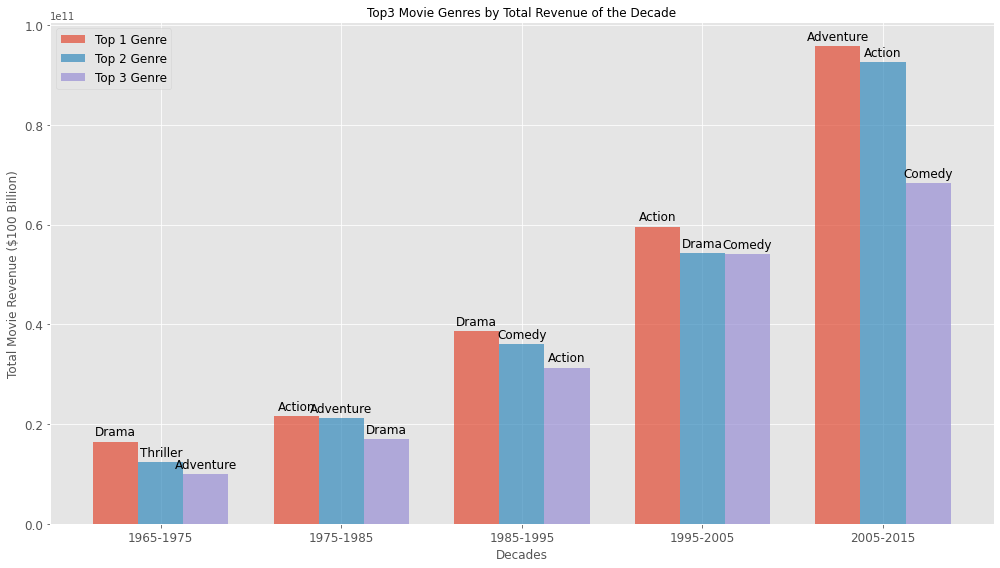

In [118]:

labels = revenue_rank.index

rev_1 = revenue_rank.loc[:,1.00]
rev_2 = revenue_rank.loc[:,2.00]
rev_3 = revenue_rank.loc[:,3.00]

gen_1 = genres_rank.loc[:,1.00]
gen_2 = genres_rank.loc[:,2.00]
gen_3 = genres_rank.loc[:,3.00]

# the width of the bars
width = 0.25

# the label locations
r1 = np.arange(len(revenue_rank.index))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]


fig, ax = plt.subplots(figsize=(14,8))
rects1 = ax.bar(r1, rev_1, width, label='Top 1 Genre', alpha=.7)
rects2 = ax.bar(r2, rev_2, width, label='Top 2 Genre',  alpha=.7)
rects3 = ax.bar(r3, rev_3, width, label='Top 3 Genre',  alpha=.7)


plt.ylabel('Total Movie Revenue ($100 Billion)', fontsize=12)
plt.xlabel('Decades', fontsize=12)
plt.title('Top3 Movie Genres by Total Revenue of the Decade', fontsize=12)
plt.xticks([r + width for r in range(len(rev_1))], revenue_rank.index.values)
plt.legend(fontsize=12, loc='upper left')

plt.xticks(size = 12)
plt.yticks(size = 12)

ax.bar_label(rects1, labels=gen_1, padding=3, fontsize=12)
ax.bar_label(rects2, labels=gen_2, padding=3, fontsize=12)
ax.bar_label(rects3, labels=gen_3, padding=3, fontsize=12)

fig.tight_layout()

plt.show()

The movie industry is fast-growing judging by the total revenue of the top3 movie genres, it will also be useful to add the number of movies for each genre to the plot.

<a id='conclusions'></a>
## Conclusions

In this project, I explored a dataset from The Movie Database containing movie information from year 1960 to 2015. Following the process of cleaning data, wrangling data and then conducting data exploratory analysis, I discovered some insights from movie genres, movie popularities, revenues, average votes and so on. The following are the main conclusions of the analysis:

### Key Takeaways
1. Movies have higher `popularities` turn to have higher `revenue` as well, this trend is not necessarily right for every single movie. However, if group movies in different levels of popularities and calculate their average revenue, it is clearly that movies have super high popularities also have much higher average revenue. The revenue differences between low popular movie and super high popular movies can reach 300 to 400 million dollars. 

1. Documentary, Music and History movies have high `average votes`, but less people turn to vote and less movies are released in these `genres`. Movies in Animation genre have high average votes, also more people are voting for them. Although most of the movies are in Drama genre, they don't get higher than average votes or more people voting on.

1. `Collin Trevorrow` is the director of the year for 2015 in terms of movie popularities, his movie **Jurassic World** has a super high popularity score of 30 plus, while the other movies normally have an average of less than 1 popularity score. `Christopher Nolan`'s movie has the highest popularity score for year 2014, 2010 and 2008. 

1. `Action` movies are in the list of top 3 movie genres have highest `revenue` for 4 decades, from 1985 to 2015, the action movies are making 30 billion dollars more revenues every decade. Although `Adventure` movies haven't been making into the top 3 list from 1985 to 2005, it is the top 1 genre in the 2005-2015 decade. `Comedy` movies has been in the top 3 list from year 1985 to 2015, but its revenue growth is small compared with that of Action movie and Adventure movie.

### Limitations and Additional Researches
1. There is no guarantee that the data is complete. In my analysis, I have explored movie genres in different years and the famous director of each year, however, if there are `missing values` in the dataset, movies are not recorded in the database for instance, the conclusions are no longer solid. On the other hand, there are quiet lots of zero values for movie revenue in the dataset, it affects the results as well.

1. There are methods to check the data before data analysis, for example, check other movie data source and compare with the data we have. Once we're confident about the data, we can evaluate the impact of our missing values. Is it randomly missing, or some year don't make sense etc.

1. There are further researches we can conduct with the dataset: predict a movie's popularity score, discover what kind of properties are most relevant with movie revenue, or with high votes.

